In [22]:
import matplotlib.pyplot as plt
import numpy as np
from cellpose import models
from cellpose.metrics import average_precision
from stardist.models import StarDist2D
from deepcell.applications import CytoplasmSegmentation
from deepcell.datasets import TissueNet
from csbdeep.utils import normalize
import os


key = 'POtyuCIN.nWwQ1FXgroiE8zKTWLgf5rdqGRJeKQHf'
os.environ.update({"DEEPCELL_ACCESS_TOKEN": key})

In [3]:
def show_prediction(image, masks):
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Image')

    plt.subplot(1,2,2)
    plt.imshow(np.squeeze(masks), cmap='jet')
    plt.axis('off')
    plt.title('Prediction')

In [4]:
tissuenet = TissueNet(version='1.1')
X_test, y_test, meta_test = tissuenet.load_data(split='test')

INFO:root:Checking for cached data


INFO:root:Checking tissuenet_v1-1.zip against provided file_hash...
INFO:root:tissuenet_v1-1.zip with hash cab3b8f242aaee02035557b93546d9dc already available.
INFO:root:Extracting C:\Users\aarus\.deepcell\datasets\tissuenet_v1-1.zip
INFO:root:Successfully extracted C:\Users\aarus\.deepcell\datasets\tissuenet_v1-1.zip into C:\Users\aarus\.deepcell\datasets


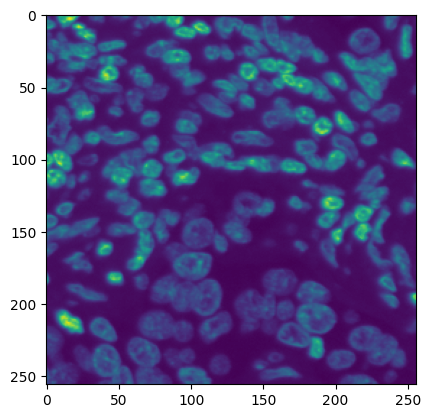

In [18]:
plt.imshow(X_test[4,...,0])

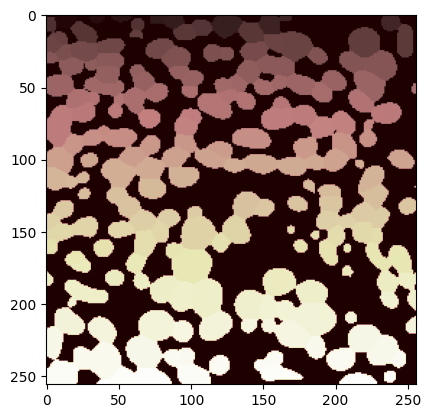

In [21]:
plt.imshow(y_test[4,...,1], cmap='pink')

In [43]:
# Test cellpose
cp_nuclear = models.CellposeModel(model_type='nuclei')
masks = [cp_nuclear.eval(x[...,0], channels=[0,0])[0] for x in X_test] 
cp_predictions = np.array(masks)




INFO:cellpose.models:>> nuclei << model set to be used
INFO:cellpose.core:>>>> using CPU
INFO:cellpose.models:>>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.dynamics:No cell pixels found.
INFO:cellpose.dynamics:No cell pixels found.


KeyboardInterrupt: 

In [37]:
cp_predictions.shape
cp_average_precision = average_precision(y_test[...,1], cp_predictions)

In [38]:
len(cp_average_precision)

4

In [39]:
X_test[...,0].shape

(1324, 256, 256)

In [41]:
masks.shape

(1324, 256)

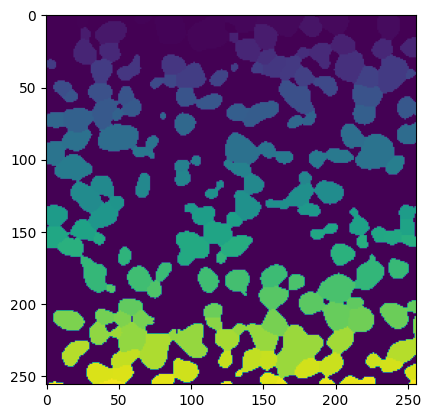

In [25]:
plt.imshow(y_test[0,...,1])

In [5]:
dp_cyto = CytoplasmSegmentation()
masks = dp_cyto.predict(np.expand_dims(X_test[...,0], 3))


In [11]:
(masks[0,...,0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
dp_ap = average_precision(y_test[...,1], masks)

In [15]:
dp_ap[1]

array([0., 0., 0.], dtype=float32)

In [23]:
sd_nuclear = StarDist2D.from_pretrained('2D_versatile_fluo')
sd_preds = [sd_nuclear.predict_instances(normalize(x[..., 0])) for x in X_test]
masks = np.array(sd_preds)

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


: 

In [ ]:
sd_ap = average_precision(y_test[...,1], masks)